In [232]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

plt.style.use('ggplot')

In [233]:
#Pengeluaran Rokok dalam seminggu

df = pd.read_stata("/IFLS/IFLS 5/ALL DTA/b3b_km.dta")
df = df[["hhid14_9","km09x", "km09" ]]

In [234]:
df = df[df["km09x"] == "1:Given"]
df.drop("km09x", axis = 1, inplace = True)
df.set_index("hhid14_9", inplace = True)

In [235]:
df.describe()

,km09
count,12344.000000
mean,68177.982502
std,60122.784938
min,0.000000
25%,28000.000000
50%,56000.000000
75%,91000.000000
max,999999.000000


In [236]:
df

,km09
hhid14_9,
001060000,35000.0
001080003,42000.0
001220000,64000.0
001220000,42000.0
001224100,105000.0
...,...
321291100,0.0
321291100,112000.0
321290000,112000.0


In [237]:
# Harta rumah tangga

df2 = pd.read_stata("/IFLS/IFLS 5/ALL DTA/b2_hr1.dta")
df2.columns

Index(['hhid14_9', 'hrtype', 'hr01', 'hr05x', 'hr06', 'hr07', 'hr08', 'hr10',
       'hr11', 'hr12x', 'hr12a', 'hr12b', 'hhid14', 'hr05', 'hr02x_f',
       'hr02x_d1', 'hr02x_g', 'hr02x_h', 'hr02x_k2', 'hr02x_a', 'hr02x_c',
       'hr02x_k1', 'hr02x_d3', 'hr02x_b', 'hr02x_e', 'hr02x_d2', 'hr02x_j',
       'hr02_f', 'hr02_d1', 'hr02_g', 'hr02_h', 'hr02_k2', 'hr02_a', 'hr02_c',
       'hr02_k1', 'hr02_d3', 'hr02_b', 'hr02_e', 'hr02_d2', 'hr02_j',
       'hr02p_f', 'hr02p_d1', 'hr02p_g', 'hr02p_h', 'hr02p_k2', 'hr02p_a',
       'hr02p_c', 'hr02p_k1', 'hr02p_d3', 'hr02p_b', 'hr02p_e', 'hr02p_d2',
       'hr02p_j', 'version', 'module'],
      dtype='object')

In [238]:
df2 = df2[["hhid14_9", "hr02_a"]]
df2.dropna(inplace = True)
df2.set_index("hhid14_9", inplace = True)

df2

,hr02_a
hhid14_9,
001060000,50000000.0
001080003,5000000.0
001220000,75000000.0
001224100,40000000.0
001240000,50000000.0
...,...
321270004,200000000.0
321280000,300000000.0
321290000,999999995.0


In [239]:
#Merge data df1 dan df2

df_merge = df.merge(df2, on = "hhid14_9")

df_merge["logRokok"] = np.log(df_merge["km09"])
df_merge["logHarta"] = np.log(df_merge["hr02_a"])

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [240]:
df_merge

,km09,hr02_a,logRokok,logHarta
hhid14_9,,,,
001060000,35000.0,50000000.0,10.463103,17.727534
001080003,42000.0,5000000.0,10.645425,15.424948
001220000,64000.0,75000000.0,11.066638,18.132999
001220000,42000.0,75000000.0,10.645425,18.132999
001220000,45000.0,75000000.0,10.714418,18.132999
...,...,...,...,...
321291100,0.0,300000000.0,-inf,19.519293
321291100,112000.0,300000000.0,11.626254,19.519293
321291100,68000.0,300000000.0,11.127263,19.519293


In [241]:
df_merge.replace(0.0, np.nan, inplace = True)
df_merge.replace(999999995.0, np.nan, inplace = True)

df_merge.dropna(inplace = True)

df_merge

,km09,hr02_a,logRokok,logHarta
hhid14_9,,,,
001060000,35000.0,50000000.0,10.463103,17.727534
001080003,42000.0,5000000.0,10.645425,15.424948
001220000,64000.0,75000000.0,11.066638,18.132999
001220000,42000.0,75000000.0,10.645425,18.132999
001220000,45000.0,75000000.0,10.714418,18.132999
...,...,...,...,...
321260000,250000.0,500000000.0,12.429216,20.030119
321270004,24000.0,200000000.0,10.085809,19.113828
321274100,54000.0,300000000.0,10.896739,19.519293


Text(0, 0.5, 'log(harta)')

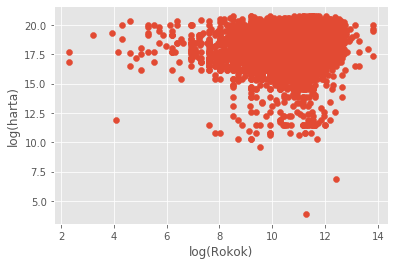

In [242]:
plt.scatter(df_merge["logRokok"],df_merge["logHarta"])

plt.xlabel("log(Rokok)")
plt.ylabel("log(harta)")

In [243]:
df_merge.shape

(8429, 4)

Text(0, 0.5, 'log(harta)')

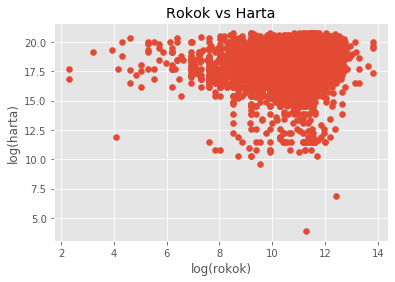

In [253]:
plt.scatter(df_merge['logRokok'], df_merge['logHarta'])  
plt.title('Rokok vs Harta')  
plt.xlabel('log(rokok)')  
plt.ylabel('log(harta)')  

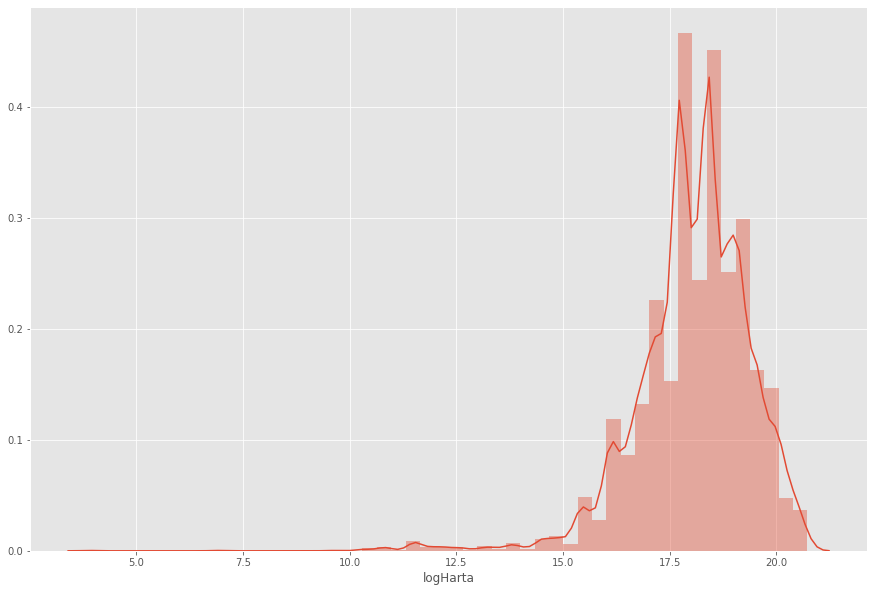

In [254]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_merge['logHarta'])

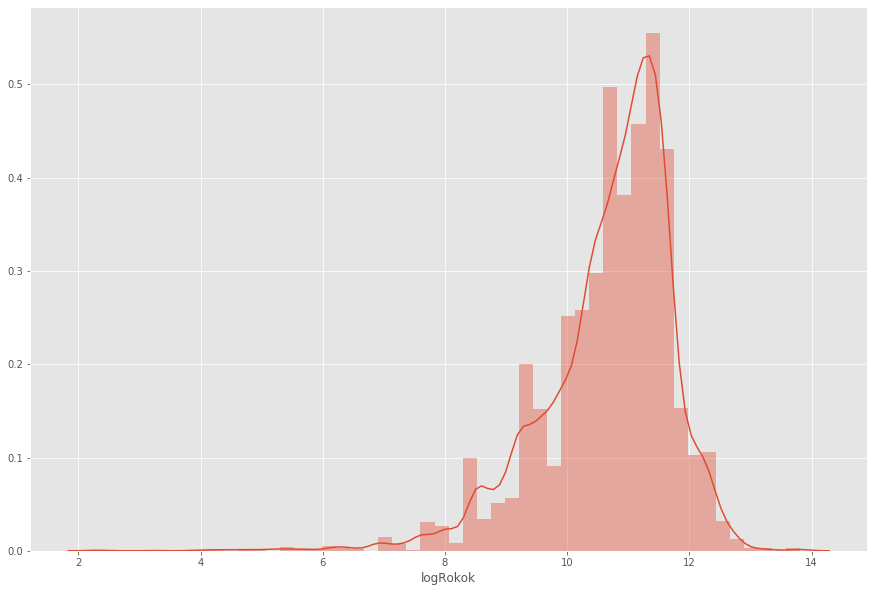

In [255]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_merge['logRokok'])

In [256]:
X = df_merge['logHarta'].values.reshape(-1,1)
y = df_merge['logRokok'].values.reshape(-1,1)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [258]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[9.26902205]
[[0.07883896]]


In [260]:
y_pred = regressor.predict(X_test)

In [261]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result

,Actual,Predicted
0,9.903488,10.638523
1,11.050890,10.317950
2,10.308953,10.721289
3,11.561716,10.721289
4,11.225243,10.874703
...,...,...
1681,9.210340,10.666642
1682,8.517193,10.721289
1683,11.338572,10.775936
1684,12.031719,10.753256


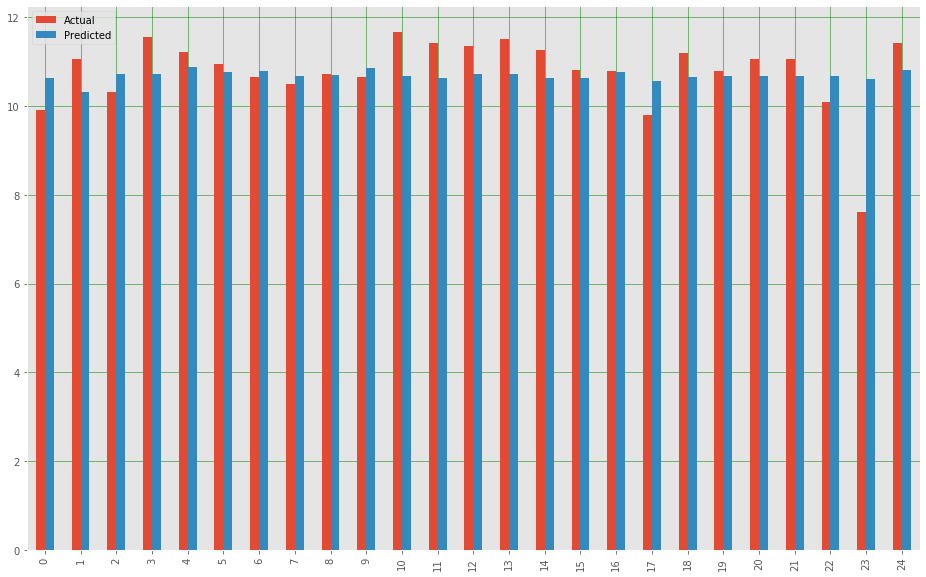

In [263]:
df1 = result.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

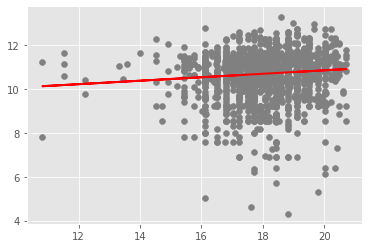

In [266]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [267]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8082205867654327
Mean Squared Error: 1.1889401388360192
Root Mean Squared Error: 1.090385316682144
